In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
heart_failure_dataset = pd.read_csv("D:\DK\Dev\Heart-Failure-Prediction-Dataset\heart.csv")
heart_failure_dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [76]:
heart_failure_dataset.shape

(918, 12)

In [77]:
heart_failure_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [78]:
heart_failure_dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [79]:
heart_failure_dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

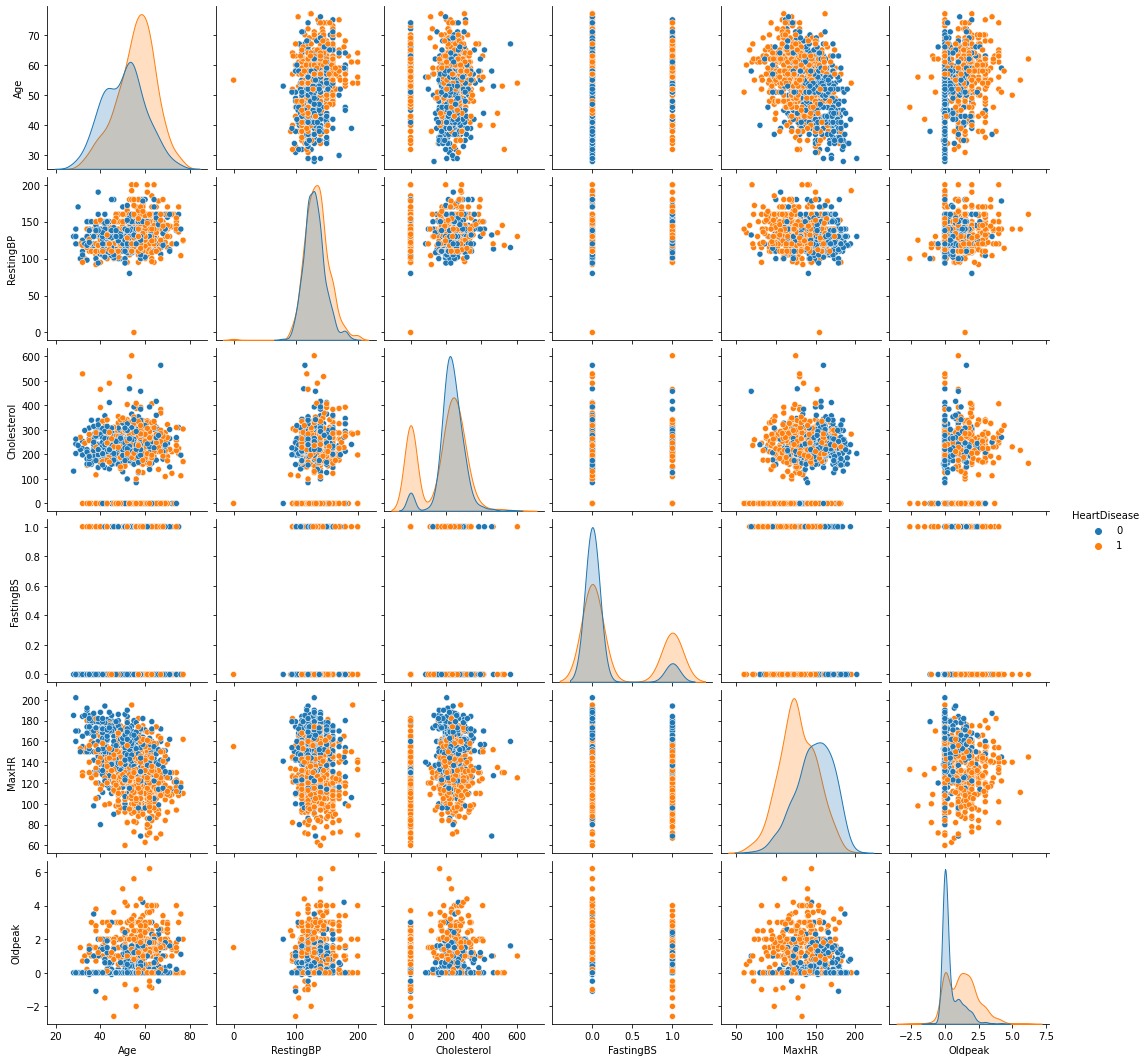

In [84]:
sns.pairplot(heart_failure_dataset,hue='HeartDisease')


In [85]:
heart_failure_dataset.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


Text(0.5, 1.0, 'Heart Diseases')

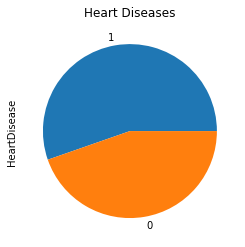

In [86]:
heart_failure_dataset.HeartDisease.value_counts().plot(kind='pie')
plt.title("Heart Diseases")

In [87]:
def Sex(value):
    if value == 'M':
        return 0
    elif value == 'F':
        return 1

In [88]:
def ChestPainType(value):
    if value == 'Asymptomatic' or value == 'ASY':
        return 0
    elif value == 'Non-Anginal Pain' or value == 'NAP':
        return 1
    elif value == 'Atypical Angina' or value == 'ATA':
        return 2
    elif value == 'Typical Angina' or value == 'TA':
        return 3

In [89]:
def RestingECG(value):
    if value == 'LVH' or value == "Showing probable or definite left ventricular hypertrophy by Estes' criteria":
        return 0
    elif value == 'ST' or value == "Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)":
        return 1
    else:
        return 2
    

In [90]:
def ExerciseAngina(value):
    if value == 'Y' or value == "Yes":
        return 1
    elif value == 'N' or value == "No":
        return 0

In [91]:
def ST_Slope(value):
    if value == 'Up' or value == 'Upsloping':
        return 0
    elif value =='Downsloping' or value == 'Down':
        return 1
    else:
        return 2

In [92]:
def typeconv(newdf):
    newdf.Sex = newdf.Sex.apply(Sex)
    newdf.ChestPainType = newdf.ChestPainType.apply(ChestPainType)
    newdf.RestingECG = newdf.RestingECG.apply(RestingECG)
    newdf.ExerciseAngina = newdf.ExerciseAngina.apply(ExerciseAngina)
    newdf.ST_Slope = newdf.ST_Slope.apply(ST_Slope)
    return newdf
    

In [93]:
a=typeconv(heart_failure_dataset)
a

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,2,172,0,0.0,0,0
1,49,1,1,160,180,0,2,156,0,1.0,2,1
2,37,0,2,130,283,0,1,98,0,0.0,0,0
3,48,1,0,138,214,0,2,108,1,1.5,2,1
4,54,0,1,150,195,0,2,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,2,132,0,1.2,2,1
914,68,0,0,144,193,1,2,141,0,3.4,2,1
915,57,0,0,130,131,0,2,115,1,1.2,2,1
916,57,1,2,130,236,0,0,174,0,0.0,2,1


In [94]:
from sklearn.model_selection import train_test_split
x = a.drop('HeartDisease', axis = 1)
y = a['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error

knn = KNeighborsClassifier(n_neighbors=2,metric='euclidean',p=2)
knn.fit(x_train, y_train)    
y_pr = knn.predict(x_test)
mean_absolute_error(y_test, y_pr)

0.39492753623188404

In [102]:
#Here error is quiet higher...lets check the error count!

In [107]:
knn.score(x_test,y_test)


0.605072463768116

<AxesSubplot:>

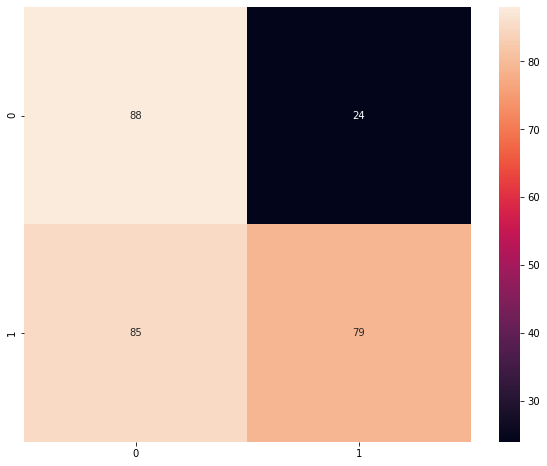

In [108]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pr)
plt.figure(figsize=(10, 8))
sns.heatmap(mat, annot=True)

In [98]:
#For selecting K value
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

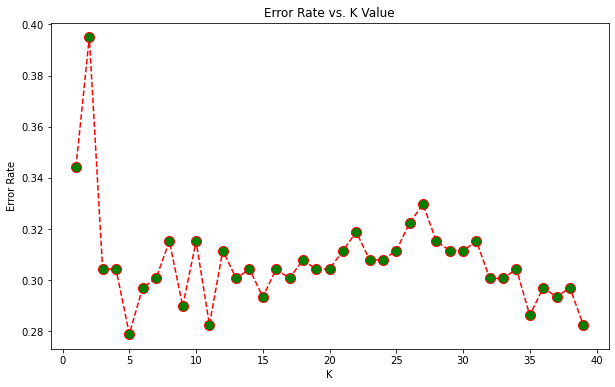

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [103]:
#from this plot we can get to know that k value of 5 has lowest error!...let's train the model with k value of 5:)

In [104]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean',p=2)
knn.fit(x_train, y_train)    
y_pr = knn.predict(x_test)
mean_absolute_error(y_test, y_pr)

0.27898550724637683

<AxesSubplot:>

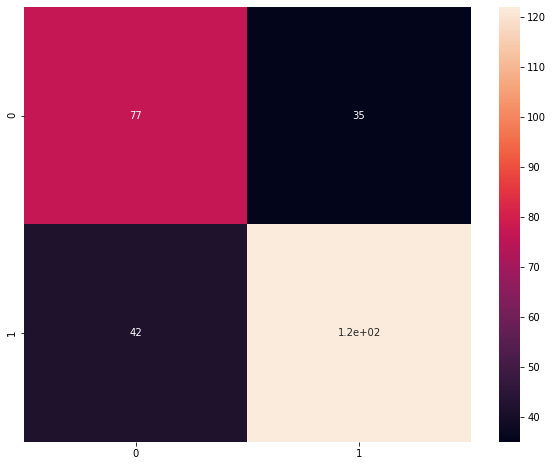

In [105]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pr)
plt.figure(figsize=(10, 8))
sns.heatmap(mat, annot=True)